# Step 1 : Installing and Importing the required Packages and Libraries

In [9]:
! pip install keras
! pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.



  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


In [73]:
#Importing the libraries for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

# Generating the Dataset

In [203]:
# Number of data points
n = 20000

# Generate random age data between 18 and 65
age = np.random.randint(18, 66, n)

# Generate random height data between 1.5m and 2.0m. Height is normally distributed in the population
height = np.random.normal(1.75, 0.1, n)  # using average adult height ~1.75m, std deviation 0.1

# Ensure no height values are outside the range [1.5, 2.0]
height = np.clip(height, 1.5, 2.0)

# Generate weight based on BMI formula. For simplicity, let's consider that BMI is normally distributed with mean=25 (overweight threshold), std deviation 5
bmi = np.random.normal(25, 5, n)  # using average BMI ~25, std deviation 5

# Ensure no BMI values are outside the range [15 (underweight), 40 (obese class III)]
bmi = np.clip(bmi, 15, 40)

# Calculate weight based on BMI = weight(kg) / (height(m))^2
weight = bmi * (height ** 2)

# Calculate weight class based on BMI
weight_class = pd.cut(bmi, bins=[0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Creating DataFrame
df = pd.DataFrame({
    'Age': age,
    'Height': height,
    'Weight': weight,
    'BMI': bmi,
    'class_': weight_class
})

print(df.head())

   Age    Height      Weight        BMI      class_
0   32  1.670465   85.218052  30.539153       Obese
1   39  1.778770  101.276708  32.008848       Obese
2   47  1.691616   78.483753  27.426854  Overweight
3   45  1.718550   72.263484  24.467789      Normal
4   24  1.829615   62.885382  18.785818      Normal


# Step 2 : Exploring the Dataset the Dataset has been Synthetically Generated

In [179]:
df.isnull().sum() # missing or NaN (Not a Number) values

Age       0
Height    0
Weight    0
BMI       0
dtype: int64

In [18]:
# dropping all remove rows with missing or NaN (Not a Number) values, you can still explore the data to clean further.

# df.dropna(inplace = True)

In [180]:
df.head()

,Age,Height,Weight,BMI
0,45,1.754637,74.042550,24.049539
1,41,1.617633,40.049410,15.305094
2,47,1.876394,89.903532,25.534587
3,42,1.643546,73.084326,27.055820
4,53,1.744494,54.771455,17.997620


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     20000 non-null  int32  
 1   Height  20000 non-null  float64
 2   Weight  20000 non-null  float64
 3   BMI     20000 non-null  float64
dtypes: float64(3), int32(1)
memory usage: 547.0 KB


# Part A : Regression

In [183]:
# Checking for correlation in my dataset
data = df[['Height', 'Weight', 'BMI']]
data.corr()

,Height,Weight,BMI
Height,1.000000,0.503175,0.002815
Weight,0.503175,1.000000,0.860012
BMI,0.002815,0.860012,1.000000


In [185]:
X = df[['Height', 'Weight']] # independent variables
y = df['BMI'] # dependent variables

In [186]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [187]:
#Standardise the dataset (you can also use StandardScaler) to Prevent dominance of any features.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # we remove .fit because we dont want to learn from the test set we only want to transform.

In [188]:
X_train

array([[0.48107036, 0.40624255],
       [0.16832885, 0.29336123],
       [0.73490813, 0.75071946],
       ...,
       [0.78808923, 0.16947178],
       [0.24695462, 0.34635805],
       [0.89888603, 0.51248806]])

In [189]:
#Import the necessary libraries to build a neural network

# needed to build a sequential model class
from keras.models import Sequential

# Dense indicates fully-connected networks and the dropout
from keras.layers import Dense, Dropout

# It is used as a loss function during model training
from keras.losses import mean_squared_error

# adopting stochastic gradient descent to optimise weights
from keras.optimizers import SGD

# It is used to evaluate the model's performance during training and/or validation
from keras.metrics import mean_squared_error

In [190]:
# instantiating and building the neural network model
model = Sequential()

#Input layer with 2 units (input_dim=2).

#First hidden layer with 64 units and ReLU activation function.
model.add(Dense(units=64,input_dim=(2), activation = 'relu'))

#Dropout layer with 20% dropout rate (helps to prevent overfitting by randomly dropping 
#(i.e. setting to zero) a fraction of the input units during training.
model.add(Dropout(0.2))

#Second hidden layer with 64 units and ReLU activation function.
model.add(Dense(units=64,activation='relu'))


#Output layer with 1 unit and linear activation function.
#The linear activation function is used in the output layer because 
#the task is a regression problem (predicting a continuous output variable).
model.add(Dense(units=1,activation = 'linear'))

In [191]:
# Printing the summary of my model   64*2 1st hidden layer Params; 64*64 last hidden layer Params
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                192       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [192]:
# model compilation

#MSE - loss function during model training
#MSE - Evaluation measure
#adam - ADAptive Moment estimation
model.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')

Early stopping is a technique used to prevent overfitting in neural networks by stopping the training process early if the model’s performance on a validation dataset stops improving.

In your example, you have imported the EarlyStopping callback from Keras and created an instance of it with the monitor argument set to 'val_loss' and the patience argument set to 20. This means that during training, the callback will monitor the validation loss, and if it doesn’t improve for 20 consecutive epochs, the training process will be stopped early.

The patience argument specifies the number of epochs to wait before stopping the training process if there is no improvement in the monitored quantity. In this case, a patience of 20 means that if the validation loss doesn’t improve for 20 consecutive epochs, the training process will be stopped.

In [193]:
# imported EarlyStopping
from keras.callbacks import EarlyStopping
# added early stopping with patience = 20
early_stopping = EarlyStopping(monitor='val_loss',patience=20)

In [154]:
# batch_size=None: The default batch size is used, which means the entire dataset will b
#epochs=10: The model will be trained for 20 epochs; 
#This means the dataset will be passed through the model 20 times for training.
#verbose='auto': The training progress will be displayed with progress bars.
#validation_split=0.2: 20% of the training data will be used for validation during train.
#callbacks=[early_stopping]: The training will be stopped early if the validation loss doesnt improve.

In [194]:
history=model.fit(x=X_train,y=y_train,batch_size=None,epochs=10,verbose='auto',validation_split=0.2,callbacks=[early_stopping])

Epoch 1/10
400/400 [==============================] - 3s 4ms/step - loss: 141.3195 - mean_squared_error: 141.3195 - val_loss: 12.2022 - val_mean_squared_error: 12.2022
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 8.9926 - mean_squared_error: 8.9926 - val_loss: 1.2402 - val_mean_squared_error: 1.2402
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 5.0125 - mean_squared_error: 5.0125 - val_loss: 0.5538 - val_mean_squared_error: 0.5538
Epoch 4/10
400/400 [==============================] - 2s 6ms/step - loss: 4.3158 - mean_squared_error: 4.3158 - val_loss: 0.3255 - val_mean_squared_error: 0.3255
Epoch 5/10
400/400 [==============================] - 2s 6ms/step - loss: 3.7491 - mean_squared_error: 3.7491 - val_loss: 0.2768 - val_mean_squared_error: 0.2768
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 3.4079 - mean_squared_error: 3.4079 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 7/10
400/400 [==

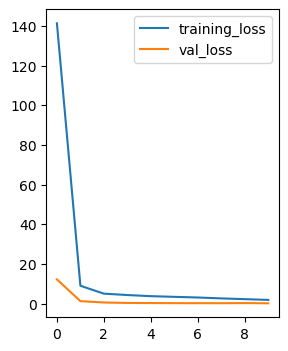

In [195]:
## checking for overfitting
#history.history
history_df = pd.DataFrame(history.history)
plt.figure(figsize = (3,4),dpi=100)
plt.plot(history_df['loss'],label='training_loss')
plt.plot(history_df['val_loss'],label='val_loss')
#plt.ylim(0,100)
plt.legend()
plt.show()

In [196]:
## Evaluation on the test data
model.evaluate(X_test,y_test)

125/125 [==============================] - 0s 2ms/step - loss: 0.1731 - mean_squared_error: 0.1731


[0.1731107085943222, 0.1731107085943222]

In [197]:
## predict new test data with the model
y_pred = model.predict(X_test)
y_pred

125/125 [==============================] - 0s 2ms/step


array([[28.161942],
       [33.07302 ],
       [28.361338],
       ...,
       [23.97756 ],
       [22.915382],
       [27.268139]], dtype=float32)

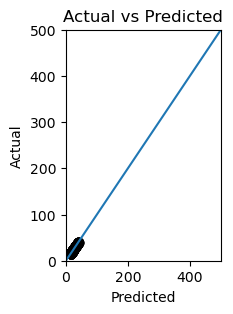

In [198]:
## Plotting the regression values
plt.figure(dpi=100, figsize = (2,3))
plt.scatter(y_pred,y_test, color ='k')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.xlim([0, 500])
plt.ylim([0,500])
plt.plot([0, 500],[0,500])
plt.show()

# Classification

In [206]:
#Assigning X and y variables for training
X = df[['Height','Weight']]
y = df['class_']
print(X.head())
print("\n")
print(y.head())

     Height      Weight
0  1.670465   85.218052
1  1.778770  101.276708
2  1.691616   78.483753
3  1.718550   72.263484
4  1.829615   62.885382


0         Obese
1         Obese
2    Overweight
3        Normal
4        Normal
Name: class_, dtype: category
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']


In [207]:
y.unique()

['Obese', 'Overweight', 'Normal', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [208]:
# Here i am splitting my dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [209]:
X_train

,Height,Weight
5894,1.700889,53.494515
3728,1.833436,93.857980
8958,1.792860,60.443891
7671,1.832403,55.722457
5999,1.797051,80.284838
...,...,...
11284,1.789678,78.846860
11964,1.740776,68.041339
5390,1.644252,74.592671
860,1.821401,55.575711


In [210]:
# Standardising the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [211]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.utils import to_categorical

In [212]:
# Reshaping is important for one hot encoding
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [142]:
# For integer encoding use sparse_categorical_crossentropy as the loss function
#le = LabelEncoder()
#y_train_le=le.fit_transform(y_train)
#y_test_le=le.transform(y_test)

In [213]:
# For binary or one hot encoding use categorical_crossentropy as loss
ohe = OneHotEncoder()
y_train_ohe=ohe.fit_transform(y_train)
y_train_ohe=y_train_ohe.toarray()
y_test_ohe=ohe.transform(y_test)
y_test_ohe=y_test_ohe.toarray()

In [214]:
y_train

[['Underweight'], ['Overweight'], ['Normal'], ['Underweight'], ['Normal'], ..., ['Normal'], ['Normal'], ['Overweight'], ['Underweight'], ['Normal']]
Length: 16000
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [215]:
model = Sequential()
# the input_shape of 2 corresponds to the predictor variables (height, weight)
model.add(Dense(units=32,input_shape = (2,),activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=4,activation='softmax'))
#softmax activation function because it is classification problem

In [221]:
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from keras.metrics import accuracy

In [224]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [223]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                96        
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 256)               8448      
                                                                 
 dense_29 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 9,572
Trainable params: 9,572
Non-trainable params: 0
_________________________________________________________________


In [225]:
history=model.fit(X_train,y_train_ohe, epochs=200,validation_split=0.20)

Epoch 1/10
400/400 [==============================] - 3s 4ms/step - loss: 0.0930 - accuracy: 0.9618 - val_loss: 0.0601 - val_accuracy: 0.9847
Epoch 2/10
400/400 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.9666 - val_loss: 0.0742 - val_accuracy: 0.9659
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0848 - accuracy: 0.9653 - val_loss: 0.0725 - val_accuracy: 0.9653
Epoch 4/10
400/400 [==============================] - 3s 6ms/step - loss: 0.0806 - accuracy: 0.9665 - val_loss: 0.0678 - val_accuracy: 0.9694
Epoch 5/10
400/400 [==============================] - 2s 6ms/step - loss: 0.0785 - accuracy: 0.9670 - val_loss: 0.0476 - val_accuracy: 0.9894
Epoch 6/10
400/400 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9698 - val_loss: 0.0452 - val_accuracy: 0.9897
Epoch 7/10
400/400 [==============================] - 2s 6ms/step - loss: 0.0780 - accuracy: 0.9691 - val_loss: 0.0601 - val_accuracy: 0.9737
Epoch 

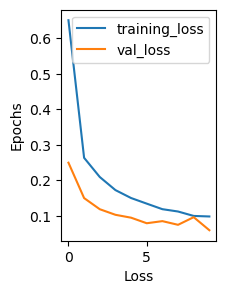

In [220]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=100, figsize = (2,3))
plt.plot(history_df['loss'],
label='training_loss')
plt.plot(history_df['val_loss'],
label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [229]:
pred=model.predict(X_test) # assigning the prediction to a variable for further evaluation

125/125 [==============================] - 0s 2ms/step


In [230]:
pred

array([[4.52262263e-08, 4.84927876e-09, 1.00000000e+00, 4.07392886e-26],
       [1.19757410e-02, 8.06899689e-25, 1.16964586e-07, 9.88024175e-01],
       [2.17925162e-07, 6.22663379e-07, 9.99999166e-01, 6.53959783e-22],
       ...,
       [8.36543797e-04, 2.60101518e-09, 9.99163508e-01, 2.73363257e-18],
       [7.37391189e-02, 2.69672440e-09, 9.26260948e-01, 2.00836086e-15],
       [3.74482106e-03, 2.44469823e-32, 6.59093391e-10, 9.96255159e-01]],
      dtype=float32)

In [231]:
pred_class = np.argmax(pred,axis=1) # argmax, axis = 1, returns the index along the column

The code pred_class = np.argmax(pred, axis=1) uses the argmax function from the NumPy library to find the index of the maximum value along the second axis (i.e., columns) of the pred array.

In the context of classification problems, this code is often used to convert the predicted probability distribution for each sample into a single class label. The pred array typically contains the predicted probabilities for each class, where each row corresponds to a sample and each column corresponds to a class. The argmax function is applied along the second axis (i.e., columns) to find the index of the column with the highest probability for each row. This index corresponds to the predicted class label for that sample.

For example, let’s say we have a binary classification problem with two classes, 0 and 1. The pred array could look like this:
    
    pred = np.array([[0.2, 0.8], [0.9, 0.1], [0.4, 0.6]])
    
    
    This means that for the first sample, the predicted probability for class 0 is 0.2 and the predicted probability for class 1 is 0.8. For the second sample, the predicted probability for class 0 is 0.9 and the predicted probability for class 1 is 0.1

In [232]:
pred_class

array([2, 3, 2, ..., 2, 2, 3], dtype=int64)

In [233]:
y_test_ohe = np.argmax(y_test_ohe,axis = 1)
y_test_ohe

array([2, 3, 2, ..., 2, 2, 3], dtype=int64)

In [234]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 2000x3000 with 0 Axes>

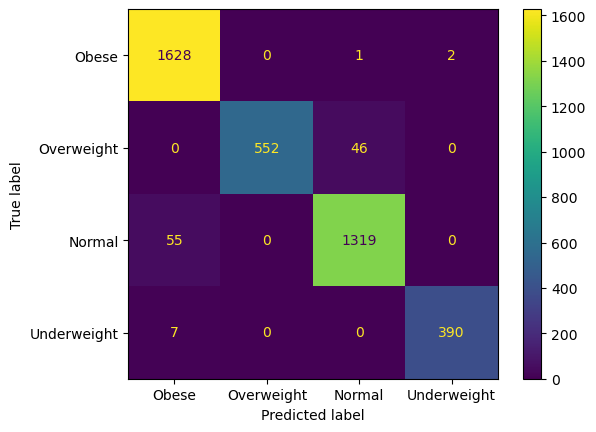

In [235]:
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test_ohe,pred_class, display_labels=df['class_'].unique())
plt.show()

In [237]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_ohe,pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1631
           1       1.00      0.92      0.96       598
           2       0.97      0.96      0.96      1374
           3       0.99      0.98      0.99       397

    accuracy                           0.97      4000
   macro avg       0.98      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

